# Proton Training and Validation Modularized

## Dependencies

In [1]:
# !pip3 install swifter
# !pip3 install xgboost
# !pip3 install tqdm
# !pip3 install category_encoders
# !pip3 install joblib
# !pip3 install scikit-plot
# !pip3 install catboost
# !pip3 install RegscorePy
# !pip3 install -U spacy
# !pip3 install gensim
# !pip3 install xlrd
# !pip3 install lightgbm
# !pip3 install hyperopt
# !pip3 install holidays
# !pip3 install textblob
# !pip3 install pydotplus
# !pip3 install graphviz
# !pip3 install imblearn
# !pip3 install missingpy
# !pip3 install urlextract
# !python -m spacy download en_core_web_sm
# !pip3 install shap
# Download en_core_web_sm for text analytics

## Main Function

pandas >= 1.0 is not supported.


Enter the path here : datasets/messy8.csv
Attempting to import 100 rows of the dataset
#### RUNNING WAIT ####
extension is csv
We have a csv file
This file has 33 columns and 100 rows

DataFrame Succesfully imported

Index(['Email', 'url_1', 'latitude_2', 'longitude_3', 'Response', 'ORDERDATE',
       'Date', 'PostingDate', 'LAST_GIFTDATE', 'lastTransactionDate',
       'CMP_A_FIRST_I_DATE', 'SchoolName', 'CBSA_DESC', 'AddressFull',
       'DEADCAT', 'toobigsmall', 'AVERAGE_ACCT_AGE', 'Latitude_17',
       'Longitude_18', 'LatitudeLongitude', 'PHONE', 'Salary',
       'CDOLL10_AVGGIFT', 'income', 'YearsCoding', 'emp_length', 'CompanySize',
       'url_27', 'emailaddress', 'NTEECoreCodeName', 'v2', 'JobSearchStatus',
       'ReviewText'],
      dtype='object')

Enter 'quit' to quit
What would you like to predict? : Salary
Target Spotted!

Enter 'quit' to quit
Enter the Key/Identification Column : 
Key  Not found in the data
Preview can't be shown!!
Do you think you have Successive Targe


Printing Missing % of date columns
                     Missing in %
CMP_A_FIRST_I_DATE          34.40
ORDERDATE                    3.54
LAST_GIFTDATE                0.00
lastTransactionDate          0.00
PostingDate                  0.00
Dropping Columns with missing greater than 35% of total number of entries

	 #### RUNNING WAIT ####

Visualizing Coloumns Generated
 {'ORDERDATE': ['ORDERDATE_month', 'ORDERDATE_year', 'ORDERDATE-today', 'ORDERDATE_nearestHoliday'], 'PostingDate': ['PostingDate_month', 'PostingDate_year', 'PostingDate-today', 'PostingDate_nearestHoliday'], 'lastTransactionDate': ['lastTransactionDate_month', 'lastTransactionDate_year', 'lastTransactionDate-today', 'lastTransactionDate_nearestHoliday'], 'CMP_A_FIRST_I_DATE': ['CMP_A_FIRST_I_DATE_month', 'CMP_A_FIRST_I_DATE_year', 'CMP_A_FIRST_I_DATE-today', 'CMP_A_FIRST_I_DATE_nearestHoliday'], 'LAST_GIFTDATE': ['LAST_GIFTDATE_month', 'LAST_GIFTDATE_year', 'LAST_GIFTDATE-today', 'LAST_GIFTDATE_nearestHoliday']}

The F

Time taken to tokenize the DataFrame 1.012019157409668
Length of token entities 148
Length of matched entities 47
Columns that are going to be removed are  []
Time taken for completion of excess column removal: 0.10570716857910156
Extracting Review Columns time 1.1300280094146729
Respective columns will undergo text engineering and will be imputed in the function itself

#### TEXT ENGINEERING RUNNING WAIT ####
The review/comment columns found are ['ReviewText']
     ReviewText-Polarity  ReviewText-Subjectivity
0                0.00000                    0.000
1                0.78125                    0.900
2                0.30000                    0.575
3                0.00000                    0.000
4                0.00000                    0.000
..                   ...                      ...
588              0.00000                    0.400
589              0.58750                    0.575
590              0.00000                    0.000
591              0.00000          

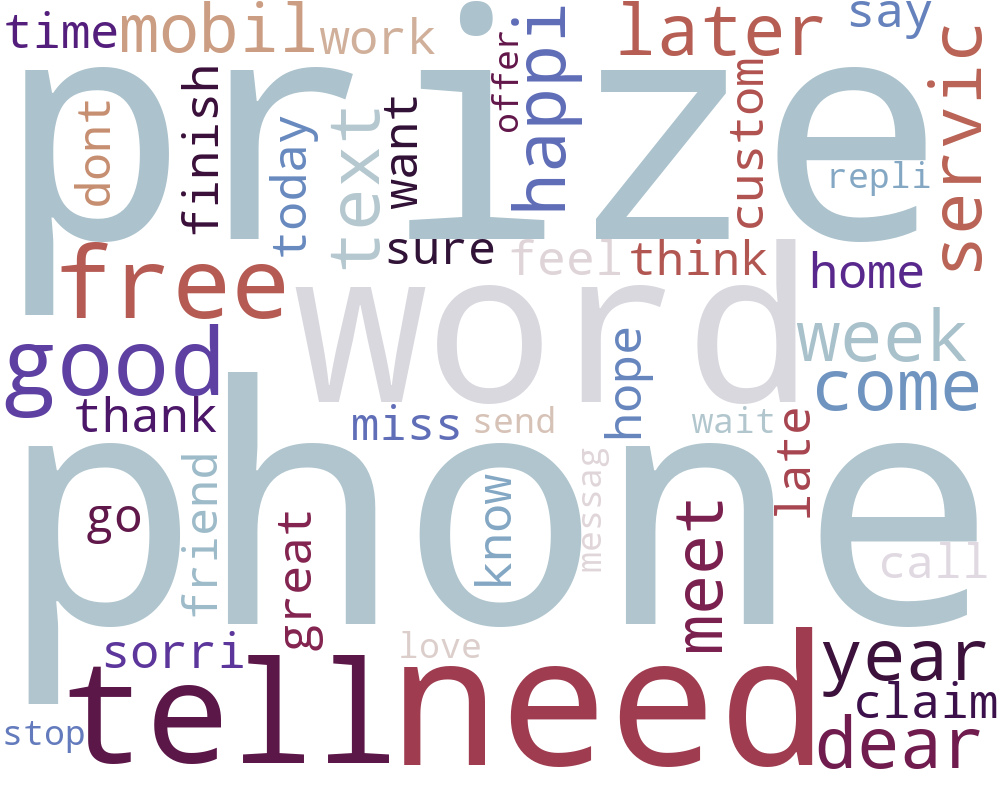

!!!!!! 593
0.21410202980041504
Topic: 0 Word: 0.112*"know" + 0.087*"wait" + 0.063*"go" + 0.058*"feel" + 0.054*"time" + 0.054*"sorri" + 0.041*"think" + 0.041*"today" + 0.041*"sure" + 0.040*"repli"
Topic: 1 Word: 0.120*"need" + 0.096*"call" + 0.077*"tell" + 0.068*"miss" + 0.057*"say" + 0.046*"claim" + 0.046*"good" + 0.040*"servic" + 0.038*"friend" + 0.036*"mobil"
Topic: 2 Word: 0.164*"text" + 0.116*"messag" + 0.061*"time" + 0.051*"week" + 0.045*"meet" + 0.044*"mobil" + 0.041*"dont" + 0.041*"sure" + 0.039*"want" + 0.033*"wait"
Topic: 3 Word: 0.225*"like" + 0.113*"come" + 0.079*"send" + 0.070*"know" + 0.053*"time" + 0.051*"word" + 0.048*"repli" + 0.046*"friend" + 0.031*"feel" + 0.025*"work"
Topic: 4 Word: 0.167*"late" + 0.100*"think" + 0.075*"say" + 0.064*"mobil" + 0.047*"sorri" + 0.042*"dont" + 0.040*"good" + 0.040*"want" + 0.034*"today" + 0.025*"dear"
Topic: 5 Word: 0.146*"great" + 0.068*"come" + 0.067*"send" + 0.057*"sorri" + 0.051*"love" + 0.049*"say" + 0.047*"claim" + 0.038*"prize" + 

  0%|          | 0/10 [00:00<?, ?it/s]

[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
k        0
0    559
1   1164
2     27
3     71
4     10
5     22
6     33
7   1027
8      3
9     17
10  1014
11     3
12     2
13   426
14    71
15     0
16     0
17     4
18     0
19     0
20     0
21     1
22     0
23     0
24     0
25     0
26     0
27     0
28  1000
29  1004
30  1005
31     0
32     0
33     0
34     0
35     0
36     0
37     0
38     0
39     5
40     0
41     0
42     0
43     0
44     2
45    51

thresh2: 8.473684210526315

The final score sheet of 16 selected columns with importances:

                                  col_name  scores2   t/f
1                          ORDERDATE-today     1164  True
7          PostingDate-lastTransactionDate     1027  True
10        CMP_A_FIRST_I_DATE-LAST_GIFTDATE     1014  True
30                              SchoolName     1005  True
29                        NTEECoreCodeName     1004  True
28                             Y

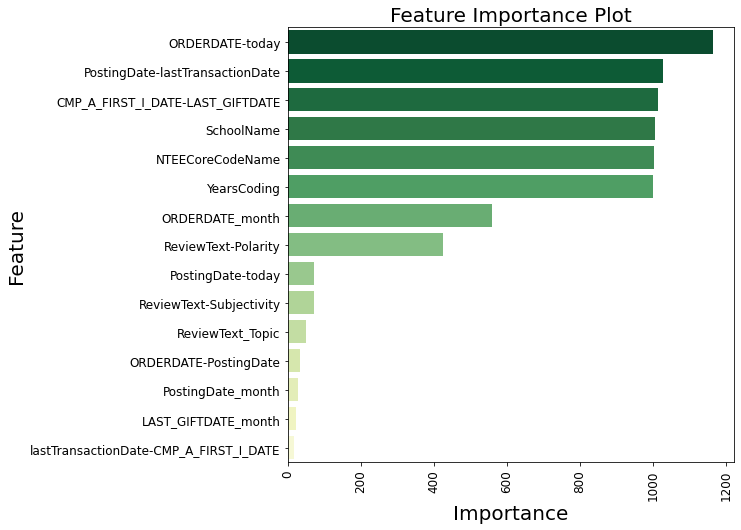

Feature Selection Plot Time taken : 0.29056382179260254
(593, 16)
(593,)

 #### SCALING ####
 #### SCALING DONE ####
(593, 16)
(593,)

 #### POWER TRANSFORMATIONS ####
 #### POWER TRANSFORMATIONS DONE ####
(593, 16)
(593,)

 #### Printing Sample Equation of the DATA ####
LABEL ENCODED FOR SAMPLE EQUATION


LINEAR REGRESSION EQUATION:


Predicted value = 4546.490974352735*ORDERDATE_month + 51.28857562141464*ORDERDATE-today + 8328.803871148395*lastTransactionDate_month + 6974.150737018024*LAST_GIFTDATE_month + 18.972595964198064*lastTransactionDate-CMP_A_FIRST_I_DATE + 5.703695453543176*CMP_A_FIRST_I_DATE-LAST_GIFTDATE + -5675.8172333480925*NTEECoreCodeName + 1593.2681664628453*SchoolName + -270587.4687094431

R squared = 0.452
(The closer R squared is to 1, the better the model is)

Where the columns are encoded like this:

+---------------------------------------------------------------+----------------------------+
| NTEECoreCodeName                                              |   NT

     url_1_domain url_27_domain
S.No                           
58          yahoo   lendingclub
237          hehe   lendingclub
621           abc   lendingclub
724           hgd   lendingclub
274           hgd   lendingclub
...           ...           ...
356           abc   lendingclub
348         yahoo   lendingclub
763         yahoo   lendingclub
594           hgd       missing
588         yahoo   lendingclub

[163 rows x 2 columns]


Pandas Apply:   0%|          | 0/23 [00:00<?, ?it/s]

The review/comment columns found are ['ReviewText']
     ReviewText-Polarity  ReviewText-Subjectivity
0               0.000000                 0.000000
1              -0.400000                 0.700000
2              -0.233333                 0.366667
3               0.500000                 0.500000
4               0.000000                 0.000000
..                   ...                      ...
158            -0.300000                 0.600000
159             0.000000                 0.000000
160             0.800000                 0.400000
161             0.600000                 1.000000
162             0.800000                 0.400000

[163 rows x 2 columns]
Sentiment time 0.15810298919677734
Bag of Words Corpus length 163
Time for append 0.023287057876586914
     ReviewText_Topic
0                   0
1                   0
2                   0
3                   0
4                   0
..                ...
158                 0
159                 0
160                 0
1

<class 'list'>
XGB Validation done
CAT Validation done
LGBM val done
RF Validation done
ET Validation done
linear reg done
ridge reg done
SVC done
this is what you are printing [0 2]
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
Accuracy : 99.99999950624814
Modelling completed
MODEL SAVED

Total Model Training Time taken : 4.197811841964722


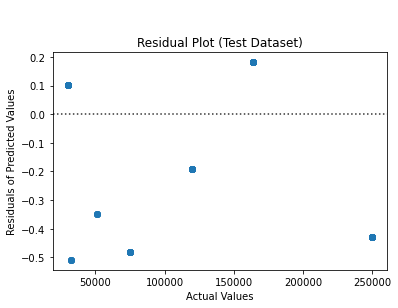

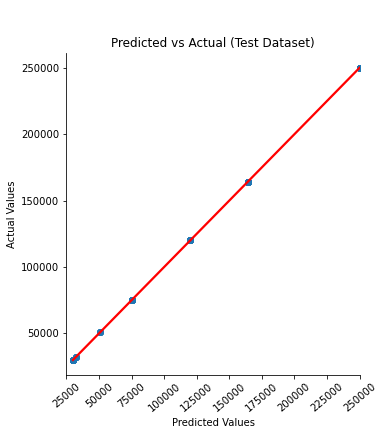


Distribution of Mean of Actual and Predicted Values by Deciles:
+----------+--------------------+-----------------------+
|   Decile |   Actualvalue_mean |   Predictedvalue_mean |
|----------+--------------------+-----------------------|
|        1 |             250000 |              249991   |
|        2 |             185635 |              185630   |
|        3 |             164180 |              164176   |
|        4 |             164180 |              164176   |
|        5 |             164180 |              164176   |
|        6 |             164180 |              164176   |
|        7 |             164180 |              164176   |
|        8 |             114273 |              114270   |
|        9 |              51250 |               51250.2 |
|       10 |              30000 |               30001.7 |
+----------+--------------------+-----------------------+


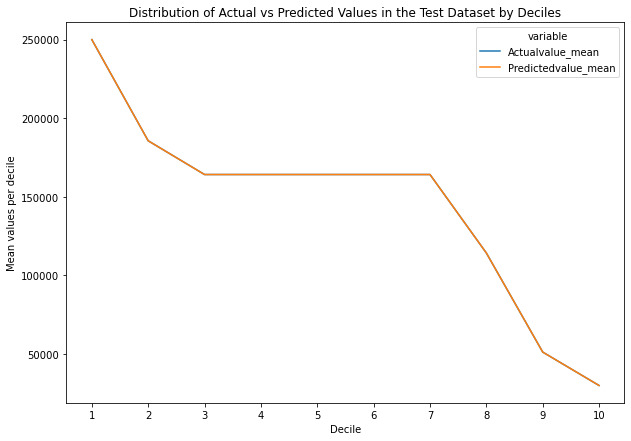

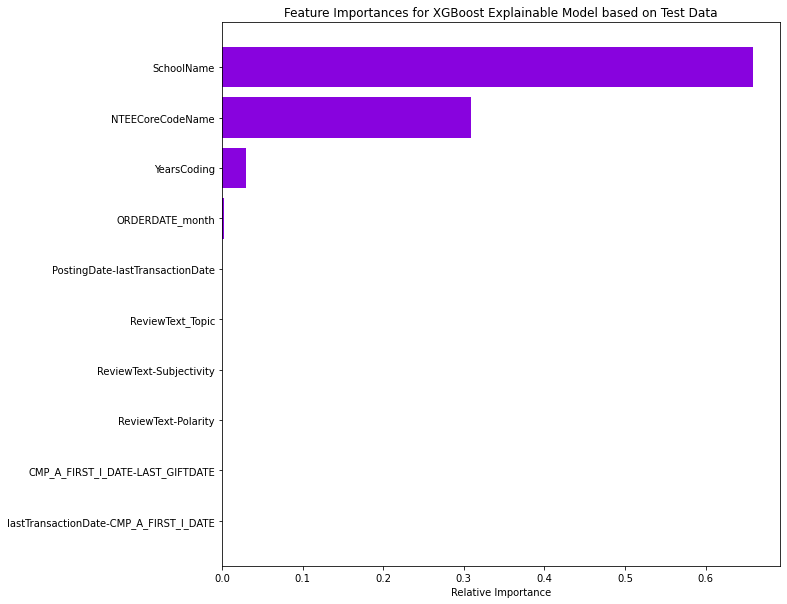

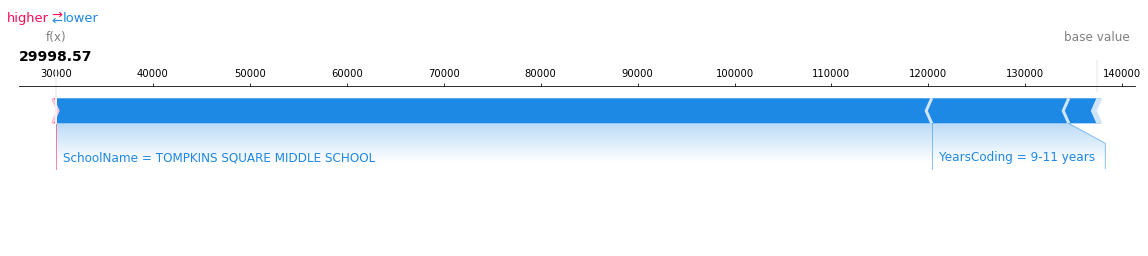

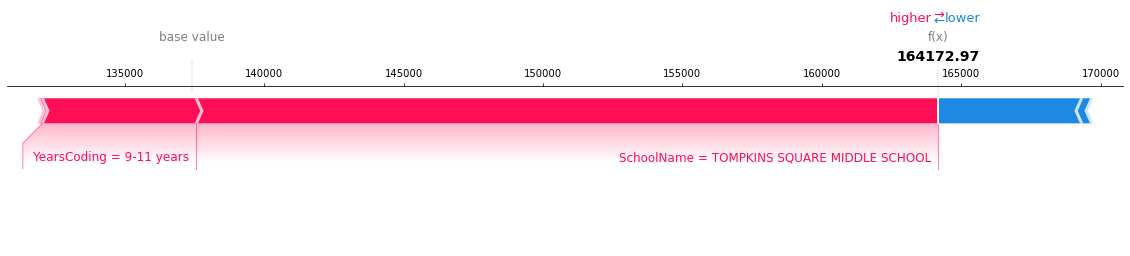

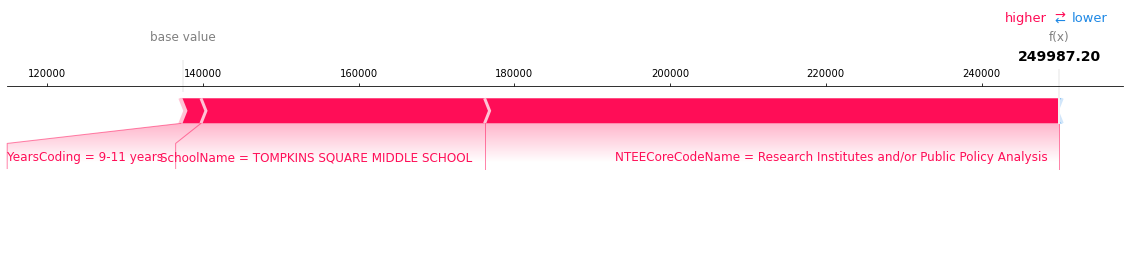

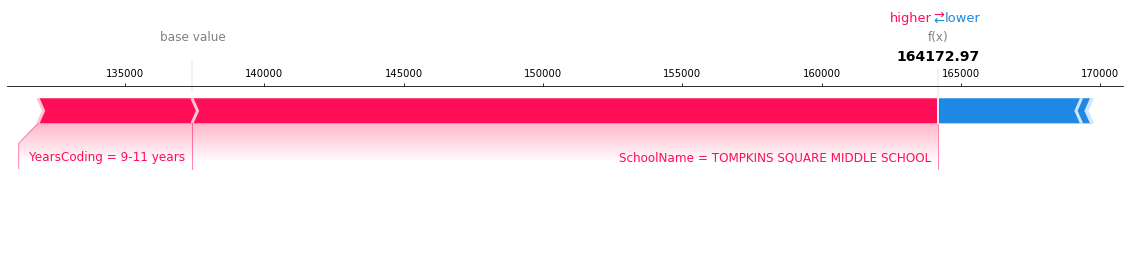

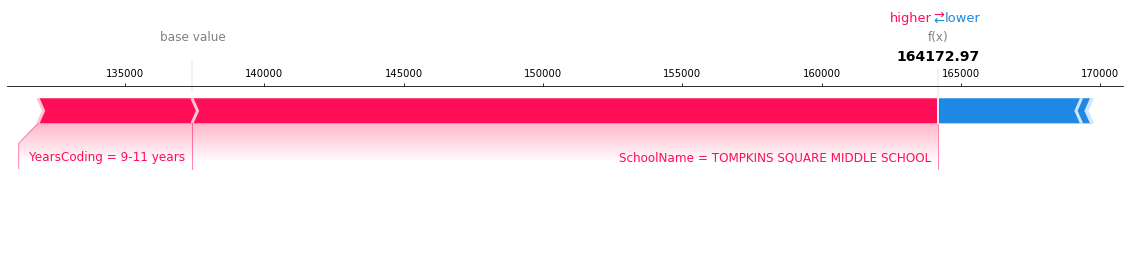

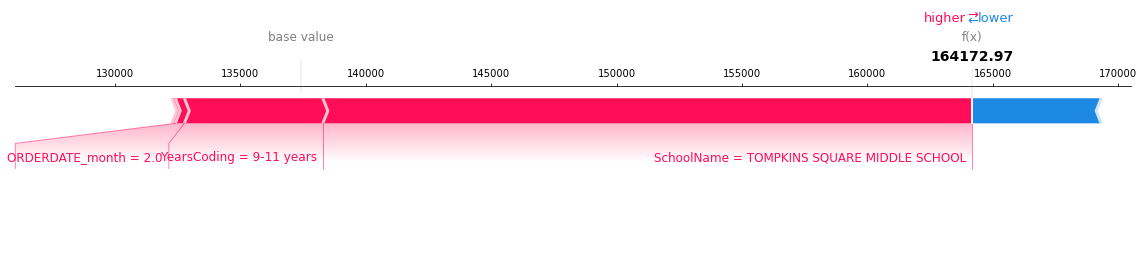

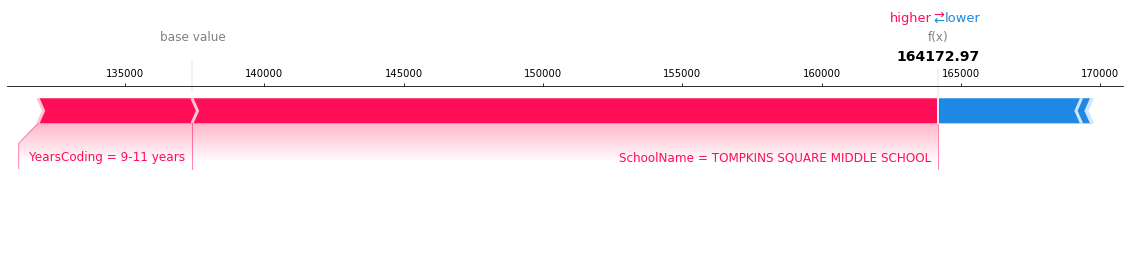

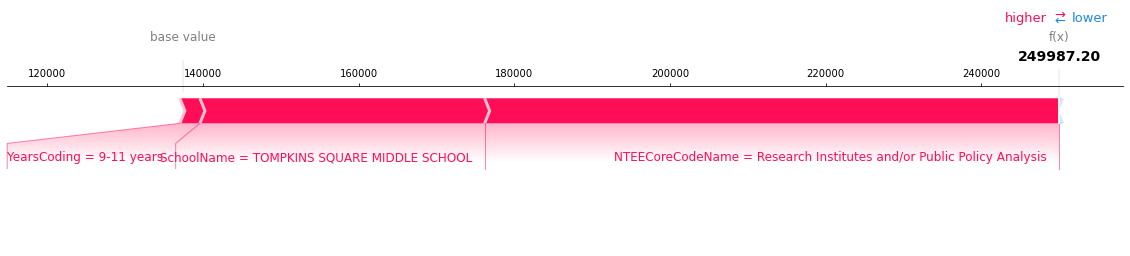

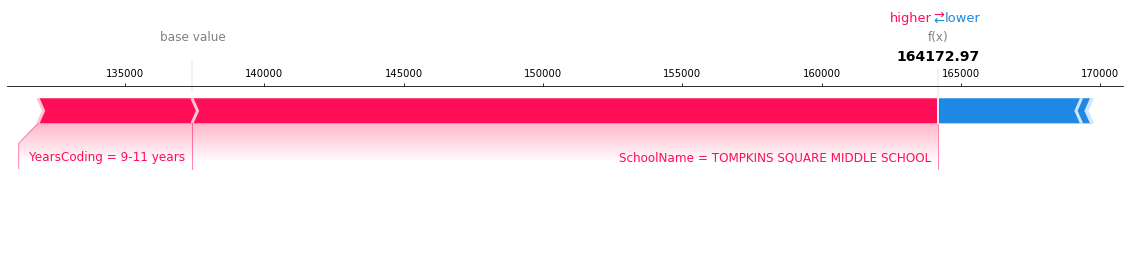

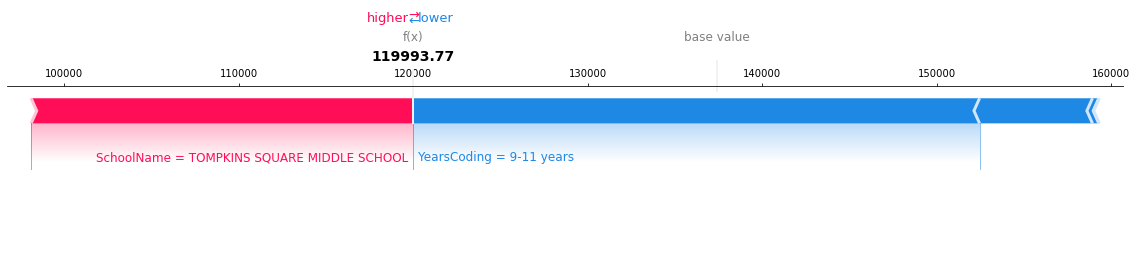

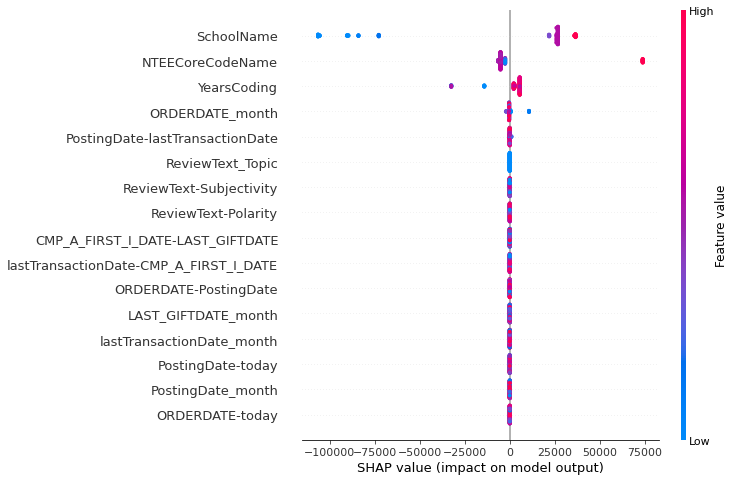


File Saved as preview.csv

Code executed Successfully

############# END ###########

	 #### CODE EXECUTED SUCCESSFULLY ####

	 #### END ####

#### TOTAL TIME TAKEN : 29.29824924468994 ####


In [2]:
from userInputs import *
from INIT import *
from score import *
from all_other_functions import *
import time
import pandas as pd
import numpy as np
import swifter
import joblib
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import re
from sklearn.model_selection import train_test_split
from engineerings import numeric_engineering
def main():
    '''
    PROTON MAIN FUNCTION
    '''
    spinnerBool = False
    path = input('Enter the path here : ')
    error = False
    if path:
        print("Attempting to import 100 rows of the dataset")
        try:
            df,csvPath = importFile(path,nrows=100)
        except ValueError:
            error_text = "Insufficient Data Error, Please collect more information"
        df = df.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))
        df = duplicateHandler(df)
        df,update = dataHandler(df) # If first few rows contains unnecessary info
        df = duplicateHandler(df)
        info = getUserInput(df)
        if not info:
            error = True
    else:
        df = None
        print('\nInitial Import Failed, Quitting Process\n')
        info = None
        error = True

    te = time.time()
    try:
        if info:
            spinnerBool = True
            ################## TRAINING INIT ##################
            if csvPath:
                path = 'SheetSheetSheet.csv'
            df,_ = importFile(path,nrows=None)
            df = df.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))
            df = duplicateHandler(df)
            df,update = dataHandler(df,info['target']) 
            df = duplicateHandler(df)
            if update is True: #If columns are removed in dataHandler() 
                cols = df.columns.to_list()
                cols.remove(info['target'])
                info['cols'] = cols
            tts = time.time()
            if isinstance(df,pd.DataFrame):
                target = info['target']
                print("###Performing Initial Numeric Engineering for Capping Purposes###")
#                 print("Initial columns",df.columns.to_list())
                dfsamp = df.sample(n=1000,random_state=1) if len(df)>1000 else df.copy()
                dfsamp = numeric_engineering(dfsamp)
                dfsamp = dfsamp.dropna(axis=0,subset=[target])
                print("###Estimating the type of target for Capping Purposes###")
                class_or_Reg = targetAnalysis(dfsamp[target])                    
                if class_or_Reg == 'Classification':
                    if len(df) >1000000:
                        df_train, _ = train_test_split(df, train_size=1000000,random_state=1, stratify=df[target])
                        print("Dataset size has been capped to 1 million rows for better performance")
                        print("Length of the dataset is now",len(df_train))
                        init_info,validation = INIT(df_train,info)
                    else:
                        print("Dataset has not been capped")
                        print("Length of the dataset is same as original",len(df))
                        init_info,validation = INIT(df,info)
                elif class_or_Reg == 'Regression':
                    dfr = df.sample(n=1000000, random_state=1) if len(df)>1000000 else df.copy()
                    print("Dataset size has been capped to 1 million rows for better performance")
                    print("Length of the dataset is now",len(dfr))
                    init_info,validation = INIT(dfr,info)
                elif class_or_Reg is None:
                    init_info,validation = None,None
            else:
                init_info,validation = None,None
            tte = time.time()
            print('\n TOTAL TRAINING DATA CLEANING AND PLOTS : {}'.format(tte-tts))
            ################## TRAINING INIT ##################

            if isinstance(validation,pd.DataFrame):
                ################## VALIDATION AND PREDICTION ##################
                score(validation,init_info,validation=True)
                ################## VALIDATION AND PREDICTION ##################
                print('\n\t #### CODE EXECUTED SUCCESSFULLY ####')
                print('\n\t #### END ####')
            else:
                print('\n\t #### CODE DID NOT RUN COMPLETELY ####')
            spinnerBool = False
    except KeyboardInterrupt:
        print('QUITTING!')   
        return None
#     except Exception as e:
#         print('Code did not run completely')
#         print('Code ran into an error')
#         print('The error message received is')
#         print(e)
#         return None
    ee = time.time()
    try:
        if not init_info['eda_df'].empty:
            userInteractVisualization(init_info['eda_df'],info['target'])
    except Exception as e:
        print(f'{e}')
    print('\n#### TOTAL TIME TAKEN : {} ####'.format(ee-te))
    return 1

if __name__ == '__main__':
    # Main Function call
    ret = main()

In [3]:
pre = pd.read_csv('preview.csv')
pre.index = np.arange(1,len(pre)+1)

# Set CSS properties for th elements in dataframe
th_prop = [
    ('padding', '5px'),
    ('font-family', 'arial'),
    ('font-size', '100%'),
    ('color', 'Black'),
    ('border', '0.5px') ,
    ('border', 'solid black'),
    ('text-align', 'center')
  ]

# Set CSS properties for td elements in dataframe
td_prop = [
#     ('background', 'rgb(232, 247, 252)'),
    ('border', '0.5px'),
    ('border','solid black'),
    ('color', 'black'),
    ('font-family', 'arial')
  ]

# Set table styles
styls = [
  dict(selector="th", props=th_prop),
  dict(selector="td", props=td_prop),
  dict(selector="caption", props=[("text-align", "left"),("font-size", "120%"),("color", 'black')])
  ]

# pre.style.set_table_styles(styls).set_caption("Preview of Test Dataset(100 rows) with Predictions and Actual Values")

pre # to display only upto 3 decimal places

,S.No,Actual Values,Predicted Values
1,485,120000.000,119997.359
2,467,164180.357,164176.112
3,562,164180.357,164176.112
4,373,164180.357,164176.112
5,50,30000.000,30001.678
...,...,...,...
96,86,32000.000,32000.979
97,228,75000.000,74999.084
98,269,164180.357,164176.112
99,719,75000.000,74999.084


In [4]:
# Set CSS properties for th elements in dataframe
th_props = [
    ('background', 'rgb(12, 64, 90)'),
    ('background', 'linear-gradient(0deg, rgba(21, 112, 157) 0%, rgba(12, 64, 90) 120%)'),
    ('padding', '5px'),
    ('font-family', 'arial'),
    ('font-size', '100%'),
    ('color', 'white'),
    ('border', '0.5px') ,
    ('border', 'solid #0c405a'),
    ('text-align', 'center')
  ]

# Set CSS properties for td elements in dataframe
td_props = [
#     ('background', 'rgb(232, 247, 252)'),
    ('border', '0.5px'),
    ('border','solid #0c405a')    
  ]

# Set table styles
styles = [
  dict(selector="th", props=th_props),
  dict(selector="td", props=td_props),
  dict(selector="caption", props=[("text-align", "left"),("font-size", "120%"),("color", 'black')])
  ]

def color_func(value):           # setting different color for F1 or RMSE column
    if value.name in ['Weighted F1','RMSE']:
        color= '#f7f7ba'
    else:
#         print(value)
        color= '#e8f7fc'
    return ['background-color: %s' %color]*len(value)


MC = pd.read_csv('MC.csv')
if 'Weighted F1' in MC.columns:          # for setting caption
    cap='This table is sorted by F1 Score(Weighted F1), higher the better'
else:
    cap ='This table is sorted by Root Mean Squared Error(RMSE), lower the better'
MC.index = np.arange(1,len(MC)+1)       # adjusting index
if 'Weighted F1' in MC.columns:        #for setting decimal places
    mc= MC.style.set_table_styles(styles).set_caption(cap).apply(color_func, axis=0).set_precision(3)
else:
    mc= MC.style.set_table_styles(styles).set_caption(cap).apply(color_func, axis=0).set_precision(2)
    
mc

,Machine Learning Model,Accuracy%,RMSE,MSE,MAE,BIC,Total time (hh:mm:ss)
1,Ensemble (XGBoost+Light Gradient Boosting Model),100.00%,4.53,20.52,3.97,573.97,00:00:00
2,XGBoost,100.00%,7.51,56.35,6.87,738.64,00:00:00
3,Random Forest,99.02%,6367.27,40542122.85,1994.89,2936.91,00:00:00
4,Linear Regression,98.41%,8120.31,65939410.19,4787.69,3016.19,00:00:00
5,Ridge Regression,98.24%,8543.34,72988709.89,5444.71,3032.75,00:00:00
6,ExtraTrees Regressor,98.09%,8903.88,79279045.64,3219.25,3046.22,00:00:00
7,CatBoost,98.00%,9127.34,83308268.76,4287.93,3054.30,00:00:02
8,Light Gradient Boosting Model,98.00%,9127.34,83308268.76,4287.93,3054.30,00:00:00
9,Support Vector Machine,-10.49%,67761.25,4591586643.33,42117.08,3707.84,00:00:00


In [5]:
# joblib.load('XT').min().min()


In [6]:
# joblib.load('Xt').min().min()

In [7]:
# joblib.load('XT').max().max()

In [8]:
# joblib.load('Xt').max().max()

In [9]:
# joblib.load('YT').max()

In [10]:
# joblib.load('Yt').max()

In [11]:
# joblib.load('YT').min()

In [12]:
# joblib.load('Yt').min()

In [13]:
# import pandas as pd
# # df = pd.read_csv('SheetSheetSheet.csv')
